# Unsupervised Learning

- Tasks that operate on datasets without labeled responses or target values
    - The goal is to capture interesting structure or information

## Applications of unsupervised learning
- Visualize structure of a complex dataset
- Density estimation to predict probabilities of events
- Compress and summarize the data
- Extract features for supervised learning
- Discover important clusters or outliers

## Example
<img src="resources/unsupervised_learning_1.png" width = "600">

## Major types of unsupervised learning methods
- Transformations
    - Processes that extract or compute information
- Clustering
    - Find groups in the data
    - Assign every point in the dataset to one of the groups

### Transformation
- One method called **density estimation** is used when you havea set of measurements scattered thoughout an area. And you want to create what you can think of as a smooth version over the whole area that gives a general estimate for how likely it would be to observe a particular measurement in some area of that space.

<img src="resources/unsupervised_learning_transformation.png" width = "600">

# Dimensionality Reduction and Manifold Learning

- Finds an approximate version of your dataset using fewer features
- Used for exploring and visualizing a dataset to understand grouping or relationships
- Also used for compression finding features for supervised learning

## Principal Component Analysis (PCA)

- It takes the cloud of original data points and finds a rotationof it, so the dimensions are statistically uncorrelated.
- PCA thentipically drops all but the most informative initial dimensions that capture most of the variation in the original dataset.

<img src="resources/pca_example.png" width = "600">

- It's important to first transform the dataset so that each features range of values has zero mean and unit variance

In [7]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Our sample fruits dataset
fruits = pd.read_table('data/fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = np.array(fruits[['fruit_label']] - 1)

## Using PCA to find the first two principal components of the breast cancer dataset

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X_cancer.shape, X_pca.shape)

(569, 30) (569, 2)


## Plotting the PCA-transformed version of the breast cancer dataset

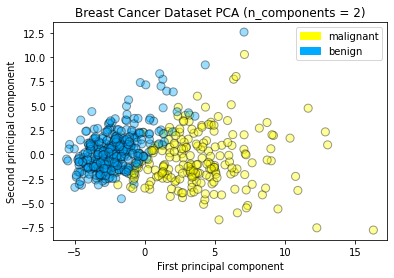

In [3]:
from utils.adspy_shared_utilities import plot_labelled_scatter
import matplotlib.pyplot as plt

plot_labelled_scatter(X_pca, y_cancer, ['malignant', 'benign'], 'Breast Cancer Dataset PCA (n_components = 2)')

## Plotting the magnitude of each feature value for the first two principal components

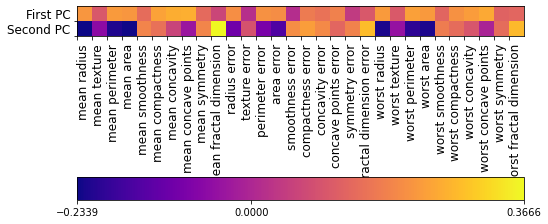

In [4]:
import numpy as np

fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(-.5, len(feature_names) - 1));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

- We can see that the first principle component isallpositive, showing ageneral correlation between all 30 featuers. In other words, they tend to vary up and down together.

- The second principle component has a mixture of positive and negative signs, but in particulat, we can see a cluster of negatively signed features that co-vary together and in the opposite direction of the remaining features.

There is afamily of unsupervised algorithms called **Manifold Learning Algorithms** that are very good at finding low dimensional structure in high dimensional data and are very useful for visualizations.

## PCA on the fruit dataset (for comparison)

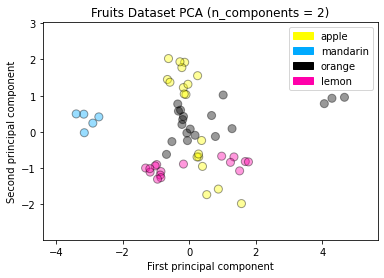

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

from utils.adspy_shared_utilities import plot_labelled_scatter
plot_labelled_scatter(X_pca, y_fruits, ['apple','mandarin','orange','lemon'], "Fruits Dataset PCA (n_components = 2)")

# Manifold

<img src="resources/manifold.png" width = "600">

- PCA is not sophisticated enough to find this structure
- A widely used manifold learning method is called **multi-dimensional scalind (MDS)**

## MDS

- The general goal is to visualize a high dimensional dataset and project it onto a lower dimensional space in a way that preservers information about how the points in the original data space are clsoe to each other.

## t-SNE

- An especially powerful manifold learning algorithm
- It finds a two-dimensional representation of the data, such that the distances between points in the 2D scatterplot match as closely as possible the distances between the same points in the original high dimensional dataset.
- It gives much more weight to preserving information about distances between points that are neighbors.
- It tends to work better on datasets that have more well-defined local structure -> More clearly defined patterns of neighbors

## Multidimensional scaling (MDS) on the fruit dataset

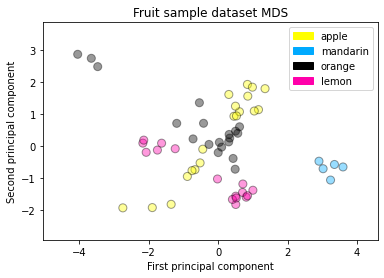

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# each feature should be centered (zero mean) and with unit variance
X_fruits_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

mds = MDS(n_components = 2)

X_fruits_mds = mds.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_fruits_mds, y_fruits, ['apple', 'mandarin', 'orange', 'lemon'], "Fruit sample dataset MDS")

## Multidimensional scaling (MDS) on the breast cancer dataset

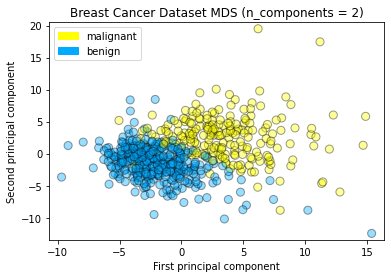

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)

plot_labelled_scatter(X_mds, y_cancer, ['malignant', 'benign'], "Breast Cancer Dataset MDS (n_components = 2)")

## t-SNE on the fruit dataset

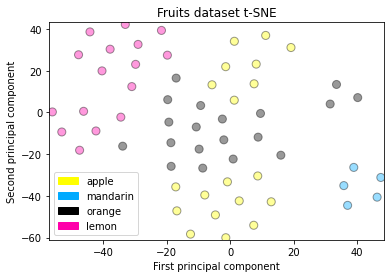

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_tsne, y_fruits, ['apple', 'mandarin', 'orange', 'lemon'], 'Fruits dataset t-SNE')

## t-SNE on the breast cancer dataset

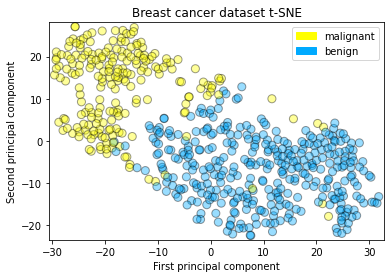

In [17]:
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y_cancer, ['malignant', 'benign'], 'Breast cancer dataset t-SNE')

# Clustering

- The goal of clustering is to find a way to divide upa dataset into groups called clusters, so that groups with similar data instances areassigned tothe same cluster, while very dissimilar objects are assigned to different clusters.

- If new data points were being added over time, some clustering algorithms could also predict which cluster a new data instance should be assigned to. Similar to classification, but without being able to train the clustering model using label examples in advance.

## K-Means Clustering

<img src="resources/kmeans.png" width = "600">

- One aspect of k means is that different random starting points for the cluster centers often result in very different clustering solutions. So tipically, k-means algorithm is run in sklearn with 10 different random initializations. And the solution ocurring the most number of times is chosen.
- It is important to **scale** the individual features before applying k-means clustering.

### Limitations of k-means
- Works well for simple clusters that are same size, well-separated, globular shapes
- Does not do well with irregular, complex clusters
- Variants of k-means like k-medoidscan work with categorical featuers (k-means assume that data is continuous)

### Without scaling the data

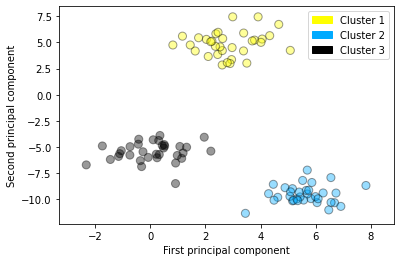

In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state = 10)

# There are some clustering algorithms that can predict which center new data points should be assigned to and some that cannot
# K-means supports the predict method, and so we can call the fit and predict methods separately
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])

### Scaling the data

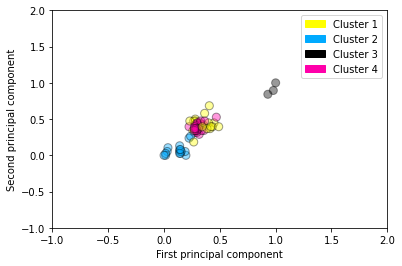

In [20]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)  

kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X_fruits_normalized)

plot_labelled_scatter(X_fruits_normalized, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

# Agglomerative clustering

- It refers to a family of clustering methods that work by doing an iterative bottom up approach

<img src="resources/agglomerative_clustering.png" width = "600">

## Linkage criteria for Agglomerative Clustering

<img src="resources/agglomerative_clustering_linkage.png" width = "600">

- In general, **Ward's method** works well on most datasets
- In some cases, if we expect the sizes of the clusters to be very different, it¡s worth trying average and complete linkage criteria as well.

##  Hierarchical Clustering

- Agglomerative Clustering automatically arranges the data into a hierarchy as an effect of the algorithm, reflecting the order and cluster distance at which each data point is assigned to succesive clusters.
    - It is useful to visualize a **dendogram**
- A dendogram can help us figure out the right number of clusters.
    - In general, we want clusters that have highly similar items withih each cluster, but that are far apart from other clusters
- Tipically, making use of thi hierarchy is most useful when the underlying data itself follows some kind of hierarchical process so the tree is easily interpreted.
    - For example, for **genetic and other biological data** where the levels represent stages of mutation or evolution.

<img src="resources/hierarchical_clustering.png" width = "600">

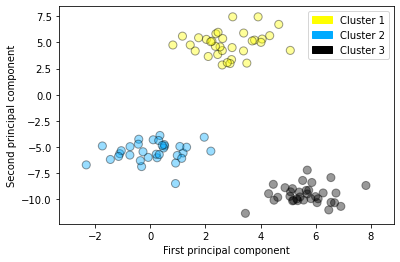

In [21]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 3)
cls_assignment = cls.fit_predict(X)

plot_labelled_scatter(X, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])

## Creating a dendrogram (using scipy)

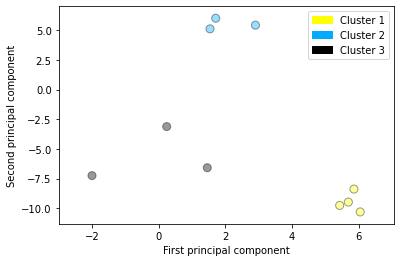

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


In [22]:
X, y = make_blobs(random_state = 10, n_samples = 10)
plot_labelled_scatter(X, y, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X)

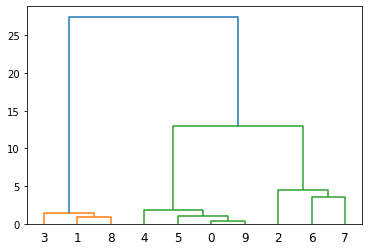

In [23]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

- In some datasets, k-means and agglomerative clustering don't perform well

## Advantages
- We don't need to specify the number of clusters in advance
- Relatively efficient - can be used with large datasets
- Identifies likely noise points

## More in depth
- All points that lie in a more dense region are called **core samples**
- For a given data point, if there are **min_sample** of other data points that lie wihtin a distance of **eps**, that given data point is labeled as a **core sample**
- Points that don't end up belonging to any cluster are considered as **noise**
- Points that are within a distance of eps units from core points, but not core points themselves, are called **boundary points**
- Label -1 means noise
    - It is important to handle this properly

<img src="resources/dbscan.png" width = "400">

Cluster membership values:
[ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


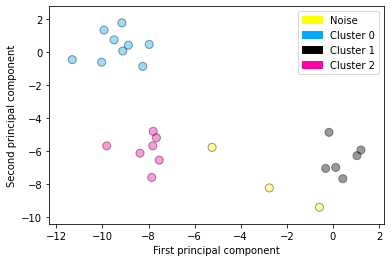

In [24]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state = 9, n_samples = 25)

dbscan = DBSCAN(eps = 2, min_samples = 2)

# DBSCAN doesn't make cluster assignments from new data.
# So we use fit_predict method to cluster and get the cluster
# assignments back in one step
cls = dbscan.fit_predict(X)

print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(X, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])

# Clustering evaluation

<img src="resources/clustering_evaluation.png" width = "400">